In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers

import os
import numpy as np
import matplotlib.pyplot as plt  

In [70]:
PATH = "C:\\Users\\Vrushank Anand\\Documents\\College Related\\Semester 7\\Project_Ykm_Sir\\Normalized_High_Pass_Filtered_Photos"

In [71]:
train_dir = os.path.join(PATH, 'train')

In [72]:
train_object_dir = os.path.join(train_dir, 'Object')  # directory with our training object pictures
train_No_object_dir = os.path.join(train_dir, 'No object')  # directory with our training no object pictures

In [73]:
num_object_tr = len(os.listdir(train_object_dir))
num_No_object_tr = len(os.listdir(train_No_object_dir))

total_train = num_object_tr + num_No_object_tr

In [74]:
print('total training object images:', num_object_tr)
print('total training No_object images:', num_No_object_tr)

print("--")
print("Total training images:", total_train)

total training object images: 1175
total training No_object images: 1091
--
Total training images: 2266


In [75]:
batch_size = 10
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [76]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

In [77]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2266 images belonging to 2 classes.


In [78]:
sample_training_images, _ = next(train_data_gen)

In [79]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 8, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

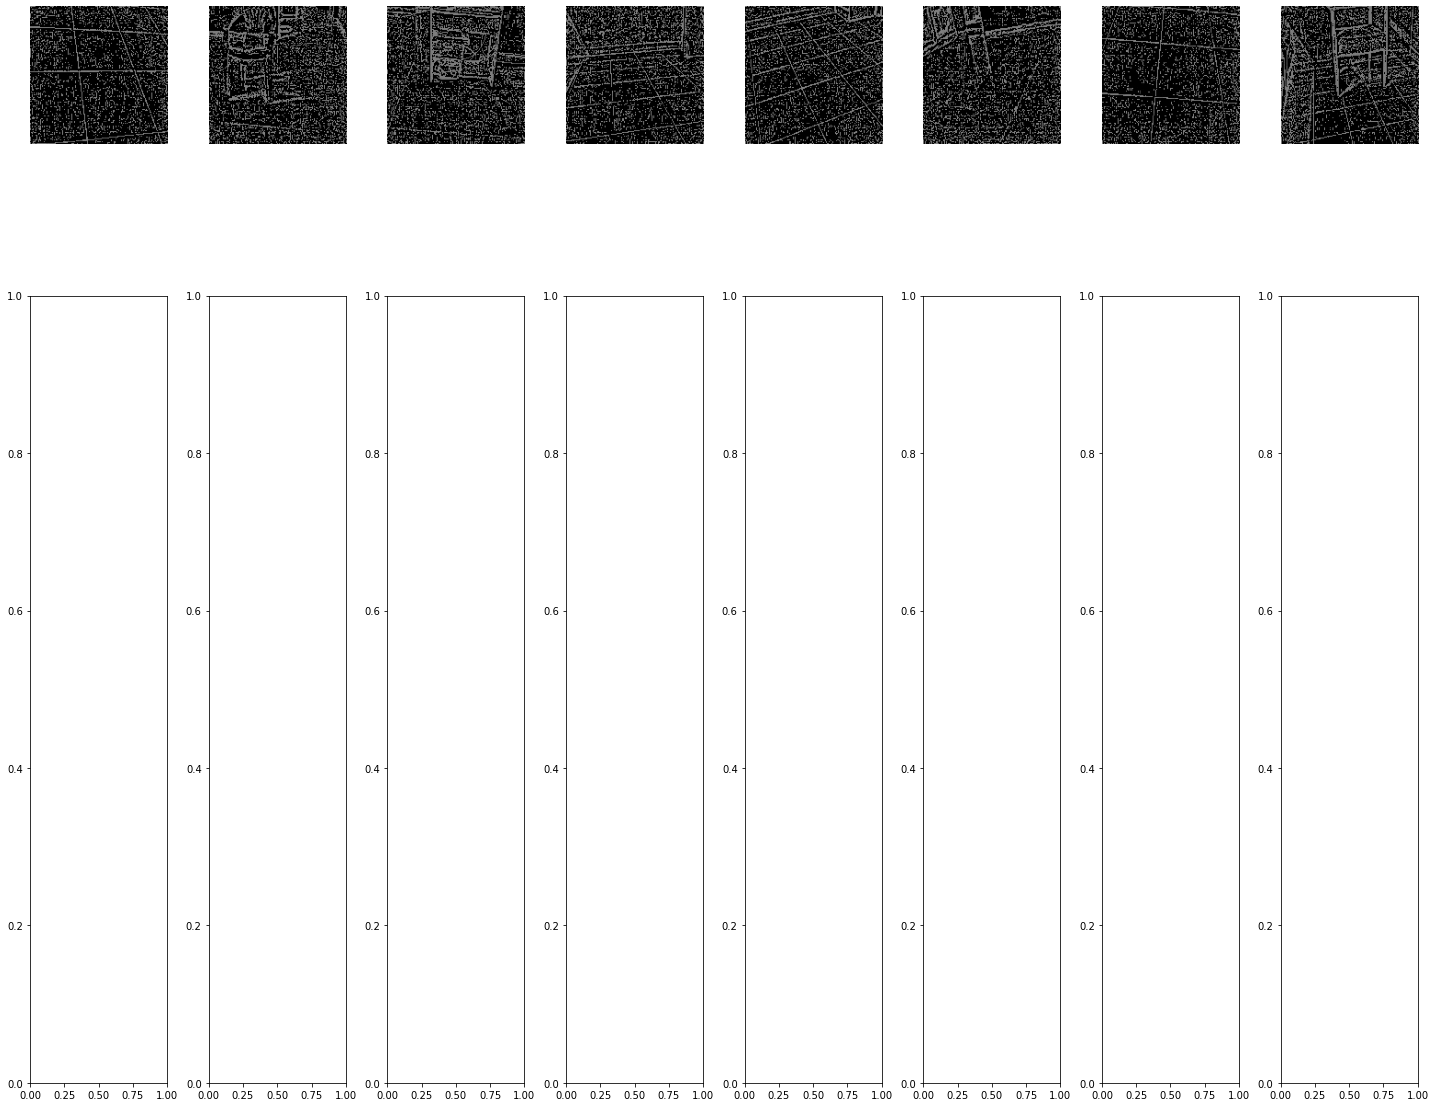

In [80]:
plotImages(sample_training_images[:8])

In [81]:
model=Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 146, 146, 16)      1216      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 73, 73, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 69, 69, 32)        12832     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 30, 30, 64)        51264     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 64)      

In [83]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    


In [84]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs
)

Epoch 1/15
226/226 [==============================] - 42s 182ms/step - loss: 0.5398 - accuracy: 0.6866
Epoch 2/15
226/226 [==============================] - 30s 135ms/step - loss: 0.1388 - accuracy: 0.9521
Epoch 3/15
226/226 [==============================] - 31s 135ms/step - loss: 0.0864 - accuracy: 0.9712
Epoch 4/15
226/226 [==============================] - 31s 135ms/step - loss: 0.0575 - accuracy: 0.9809
Epoch 5/15
226/226 [==============================] - 31s 136ms/step - loss: 0.0349 - accuracy: 0.9898
Epoch 6/15
226/226 [==============================] - 31s 136ms/step - loss: 0.0233 - accuracy: 0.9925
Epoch 7/15
226/226 [==============================] - 31s 136ms/step - loss: 0.0358 - accuracy: 0.9902
Epoch 8/15
226/226 [==============================] - 31s 136ms/step - loss: 0.0753 - accuracy: 0.9801
Epoch 9/15
226/226 [==============================] - 31s 137ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 10/15
226/226 [==============================] - 31s 136ms/step - l

In [85]:
from keras.models import load_model
model.save('object_detection_normalized_high_pass_filter_model.h5') # creates a HDF5 file